In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import argparse
import os
from sklearn.preprocessing import StandardScaler

## Util functions

In [2]:
def set_plotting_settings():
    """Set matplotlib settings for better visualizations"""
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 12

def load_activations(file_path):
    """Load activation data from .npy file"""
    try:
        activations = np.load(file_path)
        print(f"Loaded activations with shape: {activations.shape}")
        return activations
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return None

def plot_pca_comparison(activations1, activations2, n_components=2, labels=None, title="PCA Comparison of Activations", output_file="pca_comparison.png"):
    """
    Plot PCA comparison of two sets of activations
    
    Args:
        activations1: First set of activations (numpy array)
        activations2: Second set of activations (numpy array)
        n_components: Number of PCA components to use
        labels: Labels for the two datasets
        title: Plot title
        output_file: Output file path
    """
    # Set plotting settings
    set_plotting_settings()
    
    # Combine activations for PCA fitting
    combined_activations = np.vstack([activations1, activations2])
    
    # # Apply PCA
    # pca = PCA(n_components=n_components)
    # pca.fit(combined_activations)
    
    # # Transform data
    # activations1_pca = pca.transform(activations1)
    # activations2_pca = pca.transform(activations2)

    
    # Add normalization for better PCA results
    scaler = StandardScaler()
    combined_activations_scaled = scaler.fit_transform(combined_activations)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca.fit(combined_activations_scaled)
    
    # Transform data
    # Transform data
    activations1_scaled = scaler.transform(activations1)
    activations2_scaled = scaler.transform(activations2)
    activations1_pca = pca.transform(activations1_scaled)
    activations2_pca = pca.transform(activations2_scaled)


    
    # Create figure
    plt.figure(figsize=(10, 8))
    
    # Plot the first two components if n_components >= 2
    if n_components >= 2:
        # Plot activations1 points
        plt.scatter(
            activations1_pca[:, 0], 
            activations1_pca[:, 1], 
            color='blue', 
            alpha=0.6, 
            label=labels[0] if labels else "Activations 1"
        )
        
        # Plot activations2 points
        plt.scatter(
            activations2_pca[:, 0], 
            activations2_pca[:, 1], 
            color='red', 
            alpha=0.6, 
            label=labels[1] if labels else "Activations 2"
        )
        
        # Calculate and print explained variance
        explained_variance = pca.explained_variance_ratio_[:n_components]
        print(f"Explained variance ratio: {explained_variance}")
        print(f"Total explained variance: {sum(explained_variance):.4f}")
        
        # Add explained variance to axis labels
        plt.xlabel(f'PC 1 ({explained_variance[0]:.2%} variance)')
        plt.ylabel(f'PC 2 ({explained_variance[1]:.2%} variance)')
        
        # Add title and legend
        plt.title(title)
        plt.legend()
        
        # Add grid
        plt.grid(True, linestyle='--', alpha=0.7)
        
        # Save figure
        plt.tight_layout()
        plt.savefig(output_file, dpi=300)
        print(f"Saved PCA plot to {output_file}")
        
        # Display figure
        plt.show()
        
        return {
            "pca": pca,
            "activations1_pca": activations1_pca,
            "activations2_pca": activations2_pca,
            "explained_variance": explained_variance
        }
    else:
        print("Need at least 2 components to create a 2D plot")
        return None

def analyze_pca_components(pca, n_top_features=10):
    """
    Analyze what features contribute most to each principal component
    
    Args:
        pca: Fitted PCA object
        n_top_features: Number of top features to show
    """
    feature_importance = {}
    
    for i, component in enumerate(pca.components_):
        # Get the indices of the n_top_features with the largest absolute values
        sorted_indices = np.argsort(np.abs(component))[::-1]
        top_indices = sorted_indices[:n_top_features]
        
        # Store the feature indices and their importance scores
        feature_importance[f"PC{i+1}"] = [(idx, component[idx]) for idx in top_indices]
        
        print(f"\nTop features for PC{i+1}:")
        for idx, value in feature_importance[f"PC{i+1}"]:
            print(f"  Feature {idx}: {value:.4f}")
    
    return feature_importance

Loaded activations with shape: (106, 4096)
Loaded activations with shape: (106, 4096)
Explained variance ratio: [0.4447317 0.0601668]
Total explained variance: 0.5049
Saved PCA plot to ../figures/pca_3_activations_baseline.png


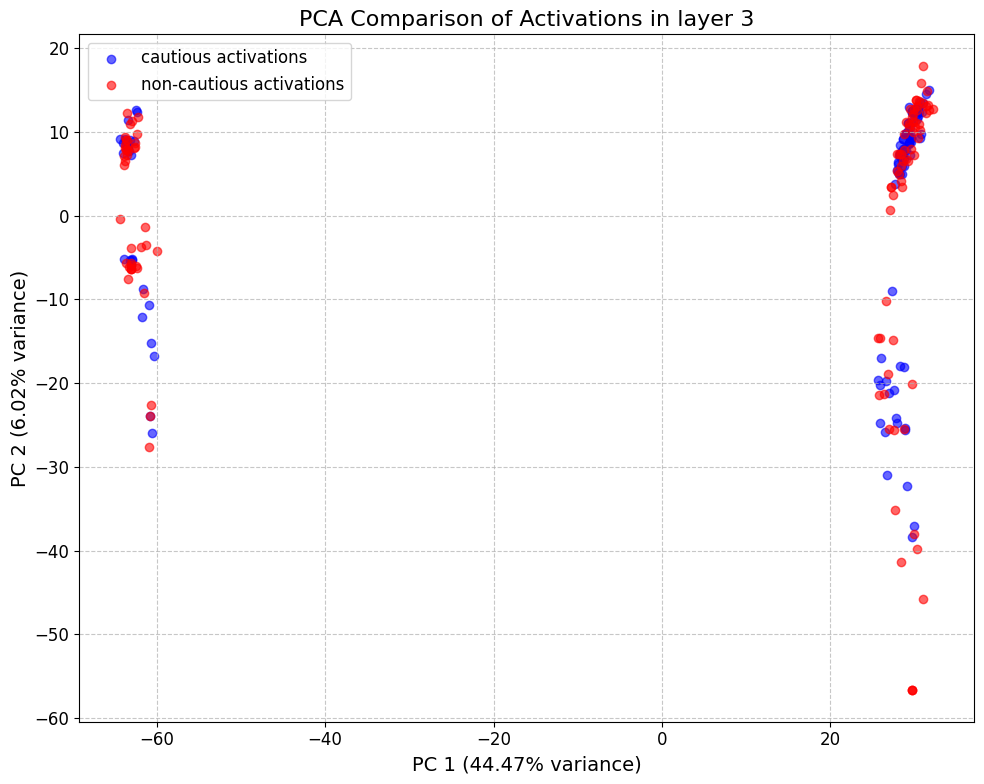


Top features for PC1:
  Feature 2352: 0.0234
  Feature 1384: 0.0234
  Feature 4062: 0.0234
  Feature 788: -0.0234
  Feature 290: 0.0234
  Feature 709: -0.0234
  Feature 2977: -0.0234
  Feature 3231: -0.0234
  Feature 1298: 0.0234
  Feature 2943: -0.0234

Top features for PC2:
  Feature 3509: 0.0507
  Feature 904: 0.0494
  Feature 1514: -0.0480
  Feature 3731: -0.0475
  Feature 1693: -0.0473
  Feature 4080: 0.0468
  Feature 3398: -0.0468
  Feature 1142: 0.0463
  Feature 1099: 0.0462
  Feature 1332: -0.0458
Loaded activations with shape: (106, 4096)
Loaded activations with shape: (106, 4096)
Explained variance ratio: [0.2703709  0.08704142]
Total explained variance: 0.3574
Saved PCA plot to ../figures/pca_7_activations_baseline.png


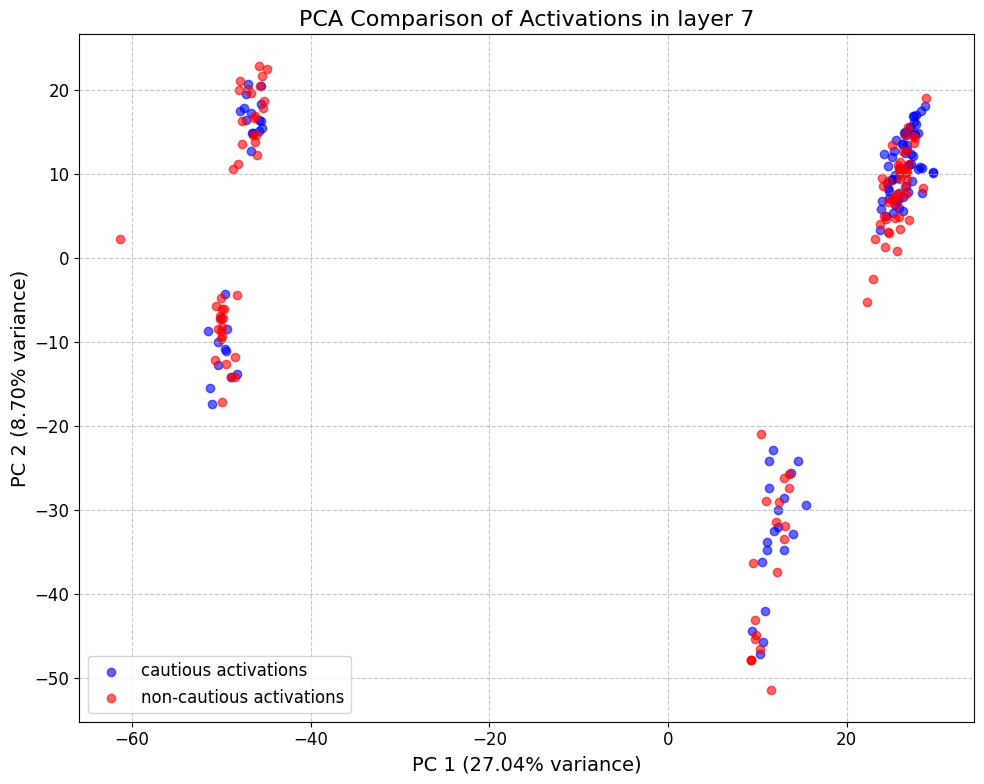


Top features for PC1:
  Feature 1298: 0.0299
  Feature 1039: 0.0298
  Feature 4055: 0.0298
  Feature 1421: -0.0298
  Feature 3266: -0.0298
  Feature 3070: 0.0298
  Feature 1260: -0.0298
  Feature 291: -0.0298
  Feature 3096: 0.0298
  Feature 991: 0.0297

Top features for PC2:
  Feature 1969: 0.0407
  Feature 2428: 0.0404
  Feature 591: -0.0396
  Feature 1442: -0.0394
  Feature 3537: -0.0390
  Feature 3078: -0.0390
  Feature 1893: 0.0389
  Feature 3707: -0.0386
  Feature 484: -0.0386
  Feature 1577: 0.0385
Loaded activations with shape: (106, 4096)
Loaded activations with shape: (106, 4096)
Explained variance ratio: [0.24184811 0.10682578]
Total explained variance: 0.3487
Saved PCA plot to ../figures/pca_11_activations_baseline.png


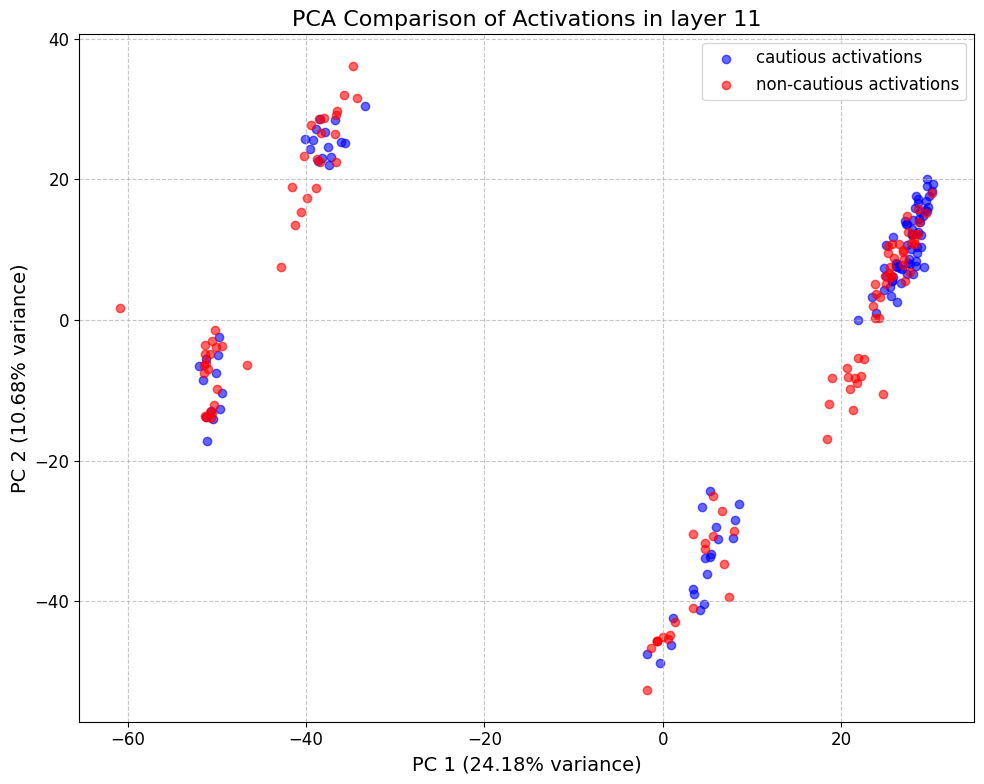


Top features for PC1:
  Feature 3096: 0.0311
  Feature 1039: 0.0311
  Feature 4055: 0.0311
  Feature 1298: 0.0310
  Feature 3070: 0.0310
  Feature 761: 0.0309
  Feature 991: 0.0309
  Feature 2261: 0.0309
  Feature 314: -0.0308
  Feature 3266: -0.0308

Top features for PC2:
  Feature 3125: 0.0402
  Feature 779: -0.0397
  Feature 3775: 0.0392
  Feature 2986: -0.0390
  Feature 1940: 0.0384
  Feature 2382: 0.0384
  Feature 1264: -0.0384
  Feature 1154: -0.0375
  Feature 703: 0.0374
  Feature 3223: -0.0372
Loaded activations with shape: (106, 4096)
Loaded activations with shape: (106, 4096)
Explained variance ratio: [0.21660349 0.10998367]
Total explained variance: 0.3266
Saved PCA plot to ../figures/pca_15_activations_baseline.png


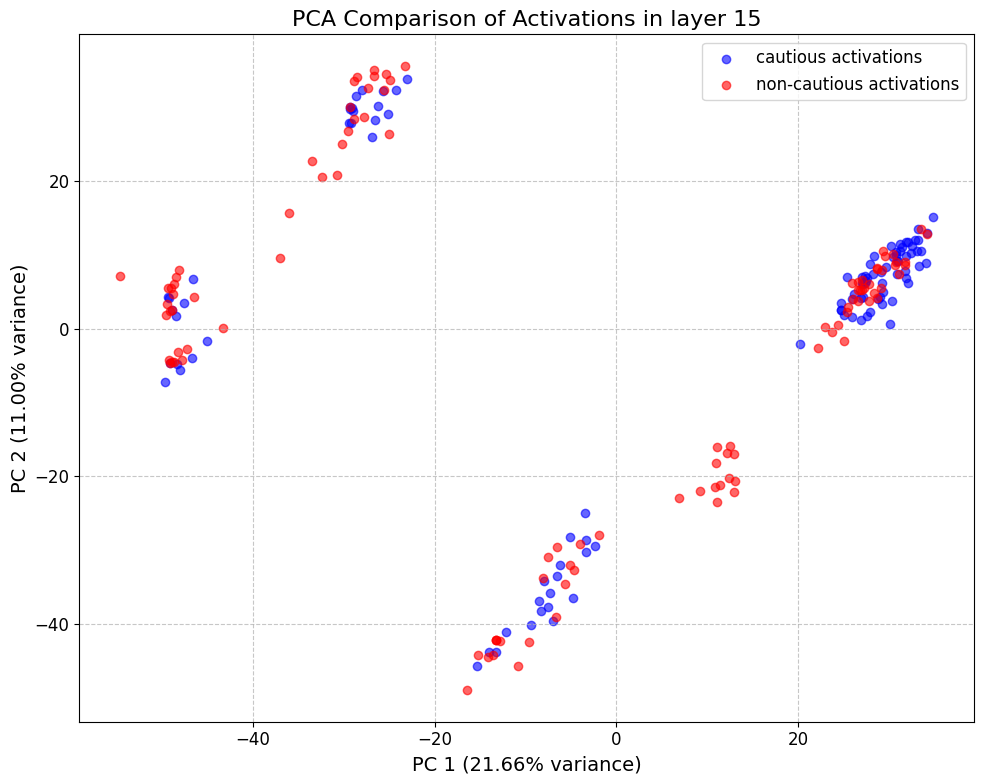


Top features for PC1:
  Feature 4055: 0.0314
  Feature 3096: 0.0313
  Feature 1298: 0.0313
  Feature 1967: -0.0312
  Feature 2261: 0.0311
  Feature 314: -0.0311
  Feature 2742: -0.0310
  Feature 213: -0.0308
  Feature 87: 0.0308
  Feature 647: 0.0307

Top features for PC2:
  Feature 1515: 0.0414
  Feature 1063: 0.0410
  Feature 644: -0.0384
  Feature 2783: -0.0383
  Feature 2984: 0.0381
  Feature 1154: -0.0380
  Feature 2382: 0.0378
  Feature 3865: 0.0377
  Feature 2216: 0.0375
  Feature 3366: 0.0374
Loaded activations with shape: (106, 4096)
Loaded activations with shape: (106, 4096)
Explained variance ratio: [0.1878249  0.09548049]
Total explained variance: 0.2833
Saved PCA plot to ../figures/pca_17_activations_baseline.png


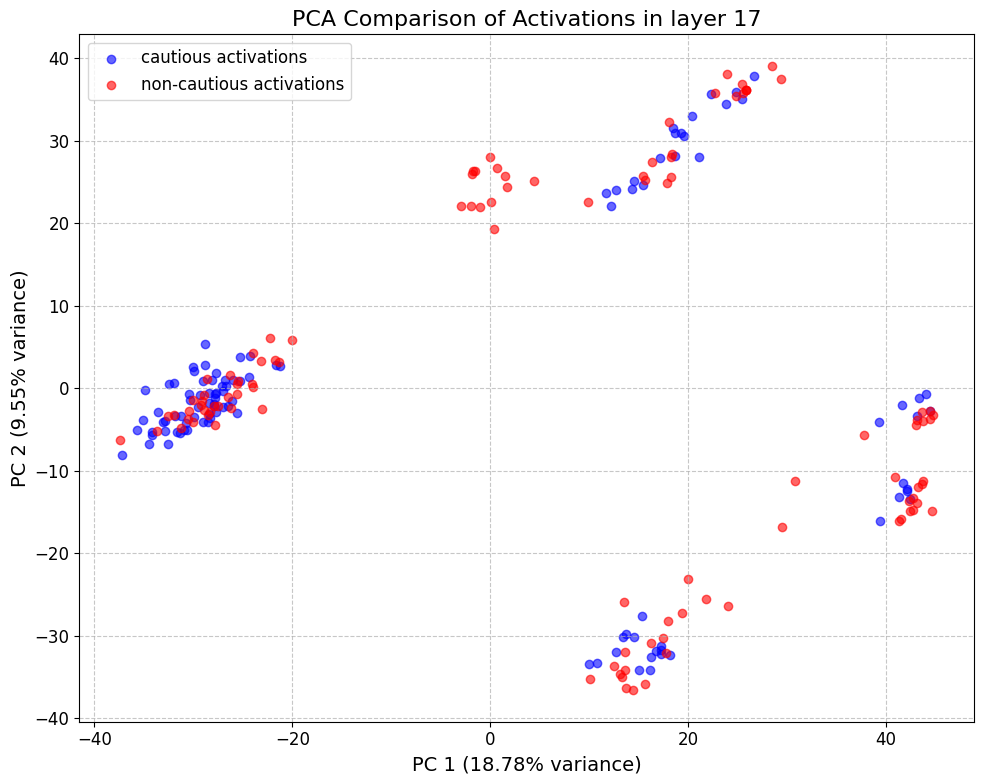


Top features for PC1:
  Feature 1026: 0.0326
  Feature 3513: 0.0322
  Feature 1591: -0.0318
  Feature 1967: 0.0317
  Feature 3667: -0.0316
  Feature 3936: -0.0315
  Feature 1689: 0.0315
  Feature 1031: -0.0315
  Feature 1310: -0.0314
  Feature 1869: -0.0314

Top features for PC2:
  Feature 1503: 0.0446
  Feature 3585: 0.0432
  Feature 2978: -0.0431
  Feature 979: 0.0431
  Feature 549: 0.0418
  Feature 1815: 0.0407
  Feature 2382: -0.0405
  Feature 2977: -0.0405
  Feature 373: 0.0405
  Feature 1800: -0.0400
Loaded activations with shape: (106, 4096)
Loaded activations with shape: (106, 4096)
Explained variance ratio: [0.16811143 0.08051883]
Total explained variance: 0.2486
Saved PCA plot to ../figures/pca_19_activations_baseline.png


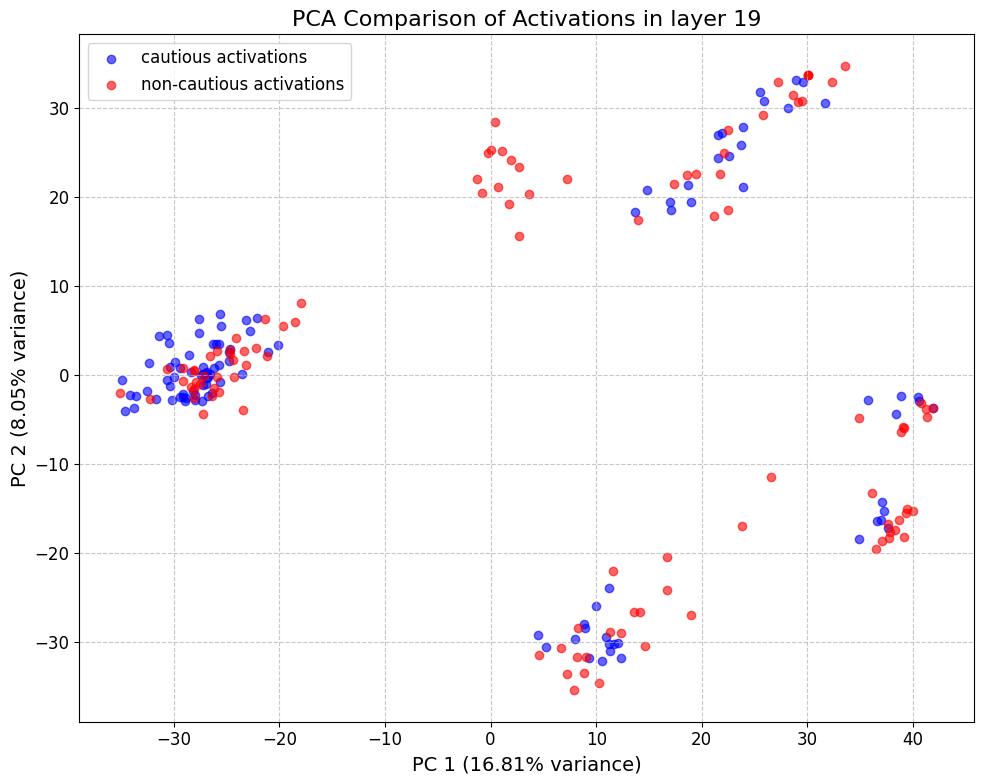


Top features for PC1:
  Feature 456: 0.0339
  Feature 1869: -0.0328
  Feature 3821: 0.0328
  Feature 2518: 0.0327
  Feature 2664: -0.0326
  Feature 1310: -0.0326
  Feature 819: -0.0326
  Feature 2734: 0.0325
  Feature 693: -0.0325
  Feature 1773: 0.0325

Top features for PC2:
  Feature 3585: 0.0497
  Feature 2978: -0.0481
  Feature 1815: 0.0471
  Feature 1503: 0.0470
  Feature 1800: -0.0470
  Feature 2977: -0.0465
  Feature 1189: -0.0459
  Feature 2992: 0.0455
  Feature 373: 0.0454
  Feature 2040: 0.0451
Loaded activations with shape: (106, 4096)
Loaded activations with shape: (106, 4096)
Explained variance ratio: [0.14876154 0.06452857]
Total explained variance: 0.2133
Saved PCA plot to ../figures/pca_23_activations_baseline.png


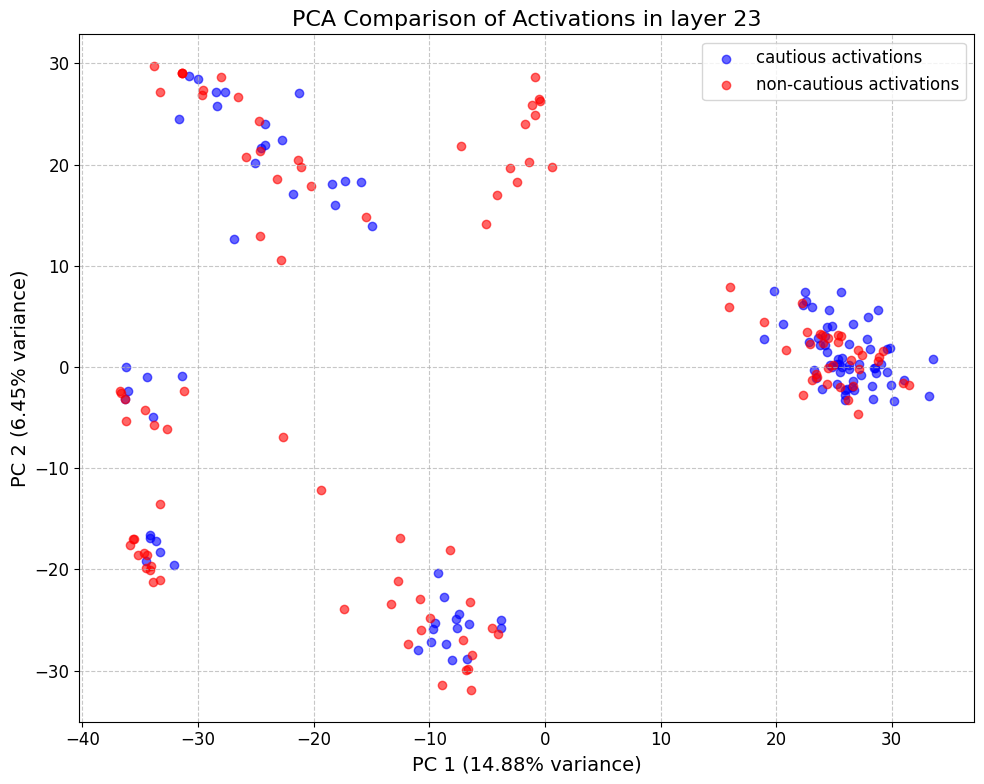


Top features for PC1:
  Feature 2700: 0.0356
  Feature 2093: 0.0346
  Feature 2566: 0.0346
  Feature 1297: -0.0342
  Feature 1591: 0.0340
  Feature 675: 0.0339
  Feature 1773: -0.0339
  Feature 693: 0.0338
  Feature 3865: 0.0336
  Feature 2345: 0.0335

Top features for PC2:
  Feature 3585: 0.0558
  Feature 1815: 0.0538
  Feature 1800: -0.0537
  Feature 3008: 0.0531
  Feature 1189: -0.0522
  Feature 2977: -0.0519
  Feature 2992: 0.0518
  Feature 709: -0.0514
  Feature 2040: 0.0506
  Feature 1168: 0.0505
Loaded activations with shape: (106, 4096)
Loaded activations with shape: (106, 4096)
Explained variance ratio: [0.13579826 0.05696009]
Total explained variance: 0.1928
Saved PCA plot to ../figures/pca_27_activations_baseline.png


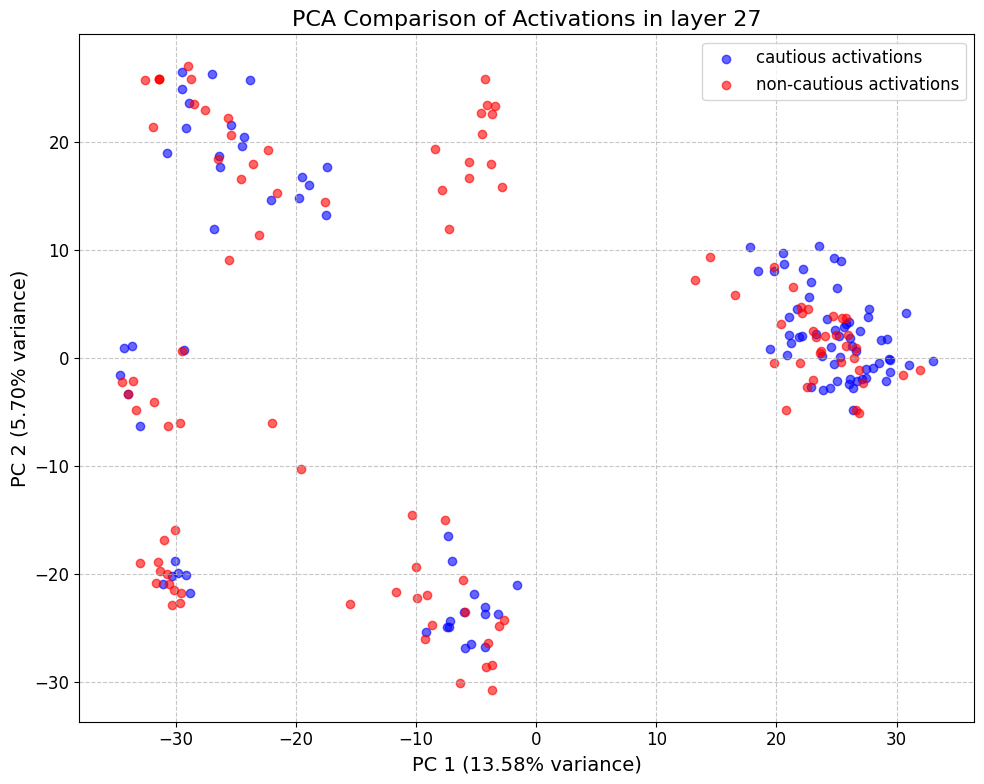


Top features for PC1:
  Feature 693: 0.0367
  Feature 2093: 0.0366
  Feature 1591: 0.0364
  Feature 1773: -0.0363
  Feature 1657: -0.0355
  Feature 352: -0.0353
  Feature 3096: 0.0352
  Feature 538: 0.0351
  Feature 4029: -0.0350
  Feature 3241: 0.0346

Top features for PC2:
  Feature 3585: 0.0587
  Feature 1800: -0.0584
  Feature 3008: 0.0583
  Feature 1815: 0.0576
  Feature 2992: 0.0559
  Feature 1189: -0.0558
  Feature 2977: -0.0556
  Feature 709: -0.0548
  Feature 2629: -0.0546
  Feature 290: 0.0537
Loaded activations with shape: (106, 4096)
Loaded activations with shape: (106, 4096)
Explained variance ratio: [0.14953038 0.09882499]
Total explained variance: 0.2484
Saved PCA plot to ../figures/pca_31_activations_baseline.png


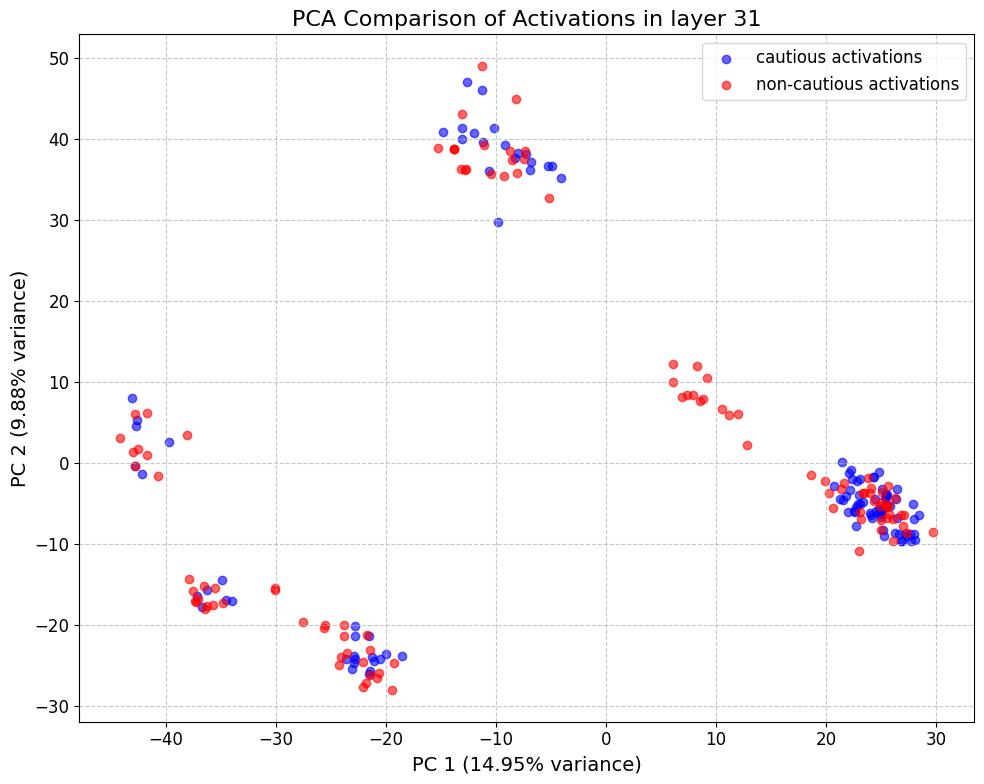


Top features for PC1:
  Feature 149: 0.0358
  Feature 2352: 0.0356
  Feature 1692: 0.0355
  Feature 3271: -0.0355
  Feature 1146: -0.0354
  Feature 87: 0.0353
  Feature 1162: -0.0352
  Feature 291: -0.0350
  Feature 314: -0.0350
  Feature 2822: -0.0349

Top features for PC2:
  Feature 2485: 0.0434
  Feature 1800: -0.0426
  Feature 613: 0.0405
  Feature 2040: 0.0401
  Feature 3008: 0.0398
  Feature 3585: 0.0392
  Feature 213: -0.0392
  Feature 4028: 0.0385
  Feature 3965: 0.0385
  Feature 478: -0.0382


In [ ]:
def main():
    ndims = 2
    layers = [3,7,11,15,17,19,23,27,31]
    labels = ["cautious activations", "non-cautious activations"]
    activations_dir = "../activations/baseline/"
    output_dir = "../figures/pca/"
    
    for layer in layers:
        # Load activations
        activations_cautious = load_activations(os.path.join(activations_dir, f"deepseek_layer_{layer}_cautious_activations.npy"))
        activations_noncautious = load_activations(os.path.join(activations_dir, f"deepseek_layer_{layer}_noncautious_activations.npy"))
        
        if activations_cautious is None or activations_noncautious is None:
            print("Failed to load one or both activation files. Exiting.")
            return
        
        # Check dimensions
        if activations_cautious.shape != activations_noncautious.shape:
            print(f"Warning: Activation shapes don't match - {activations_cautious.shape} vs {activations_noncautious.shape}")
        
        # Plot PCA comparison
        result = plot_pca_comparison(
            activations_cautious, 
            activations_noncautious, 
            n_components=ndims,
            labels=labels,
            title=f"PCA Comparison of Activations in layer {layer}",
            output_file=os.path.join(output_dir, f"pca_{layer}_activations_baseline.png")
        )
        
        # Analyze PCA components if requested
        if result:
            analyze_pca_components(result["pca"])

main()